In [1]:
import json
import re
from pnf import PointFigureChart
import pandas as pd
import numpy as np

# Define your column names here
column_names = ['open_time', 'open', 'high', 'low', 'close', 'volume', 
                'close_time', 'quote_volume', 'count', 
                'taker_buy_volume', 'taker_buy_quote_volume', 'ignore']


In [2]:

# Load the CSV data into a DataFrame, setting column names directly
df = pd.read_csv('btcusdt.csv', names=column_names, header=None)

df = df.rename(columns={'open_time': 'date'})

df['date'] = pd.to_datetime(df['date'], unit='ms').dt.strftime('%Y-%m-%d')
print(df['open'][1])

# Convert the DataFrame to a dictionary of NumPy arrays
data_dict = {col: np.array(df[col]) for col in df.columns}

# Step 2: Create a Point and Figure Chart
# This assumes you have a function or class PointFigureChart available.
# You might need to adjust parameters or implementation details based on the actual library or your custom function.
chart = PointFigureChart(data_dict, 'cl', 3, 0.1, 'log', 'BTCUSDT')


42397.22


In [3]:
chart.bollinger(10, 2)
chart.donchian(8,2)
chart.psar(0.02, 0.2)
chart.sma(10)
#chart.cut2indicator=True

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 43129.346 ,
       43365.263 , 43609.6755, 43861.3265, 44118.252 , 44373.3   ,
       44623.824 , 44834.1045, 45016.4685, 45166.7045, 45275.1165,
       45363.4855, 45426.756 , 45465.199 , 45483.321 , 45510.559 ,
       45540.0455, 45551.391 , 45526.4925, 45474.3505, 45408.5415,
       45347.18  , 45308.6595, 45274.7225, 45234.0495, 45179.7365,
       45114.222 , 45066.7585, 45050.984 , 45050.984 , 45064.5215,
       45073.56  , 45071.305 , 45084.849 , 44893.3355, 44561.99  ,
       44304.995 , 44055.8435, 43812.9475, 43556.7905, 43270.257 ,
       42968.634 , 42678.451 , 42438.618 , 42458.0455, 42619.4695,
       42689.821 , 42717.521 , 42734.5805, 42764.4485, 42787.7945,
       42823.8365, 42874.7845, 42864.0935, 42806.072 , 42754.432 ,
       42728.716 , 42730.8545, 42730.8545, 42741.5725, 42790.8015,
       42844.3655, 42870.0685, 42889.332 , 42908.5845, 42940.7

In [4]:
chart._prepare_variables_for_plotting()


In [5]:
with open('index.html', 'r') as file:
    data = file.read()

In [6]:
pattern = r'let title = \".*?\";'
data_str = json.dumps(chart.title)
# Replace the matched pattern with the new data string
data = re.sub(pattern, f'let title = {data_str};', data, flags=re.DOTALL)


In [7]:
pattern = r'let scaling = \".*?\";'
data_str = json.dumps(chart.scaling)
# Replace the matched pattern with the new data string
data = re.sub(pattern, f'let scaling = {data_str};', data, flags=re.DOTALL)


In [8]:
pattern = r'let boxSize = .*?;'
data_str = json.dumps(chart.boxsize)
# Replace the matched pattern with the new data string
data = re.sub(pattern, f'let boxSize = {data_str};', data, flags=re.DOTALL)


In [9]:
pattern = r'let matrix = \[.*?\];'
data_str = json.dumps(chart.plot_matrix.tolist())
# Replace the matched pattern with the new data string
data = re.sub(pattern, f'let matrix = {data_str};', data, flags=re.DOTALL)


In [10]:
pattern = r'let boxScale = \[.*?\];'
data_str = json.dumps(chart.plot_boxscale.tolist())
# Replace the matched pattern with the new data string
data = re.sub(pattern, f'let boxScale = {data_str};', data, flags=re.DOTALL)


In [11]:
pattern = r'let trendLines = \{.*?\};'
data_str = json.dumps({k: v.tolist() for k, v in chart.get_trendlines().items()})
# Replace the matched pattern with the new data string
data = re.sub(pattern, f'let trendLines = {data_str};', data, flags=re.DOTALL)


In [12]:
pattern = r'let breakOuts = \{.*?\};'
data_str = json.dumps({k: v.tolist() for k, v in chart.get_breakouts().items()})
# Replace the matched pattern with the new data string
data = re.sub(pattern, f'let breakOuts = {data_str};', data, flags=re.DOTALL)


In [13]:
pattern = r'let indicators = \{.*?\};'
data_str = json.dumps({k: v.tolist() for k, v in chart.plot_indicator.items()})
# Replace the matched pattern with the new data string
data = re.sub(pattern, f'let indicators = {data_str};', data, flags=re.DOTALL)


In [14]:
pattern = r'let columnLabels = \[.*?\];'
data_str = json.dumps(chart.column_labels)
# Replace the matched pattern with the new data string
data = re.sub(pattern, f'let columnLabels = {data_str};', data, flags=re.DOTALL)
chart.column_labels

['2024-01-01',
 '2024-01-01',
 '2024-01-01',
 '2024-01-01',
 '2024-01-01',
 '2024-01-01',
 '2024-01-01',
 '2024-01-01',
 '2024-01-01',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-02',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-03',
 '2024-01-

In [15]:
with open('btc2.html', 'w') as file:
    file.write(data)

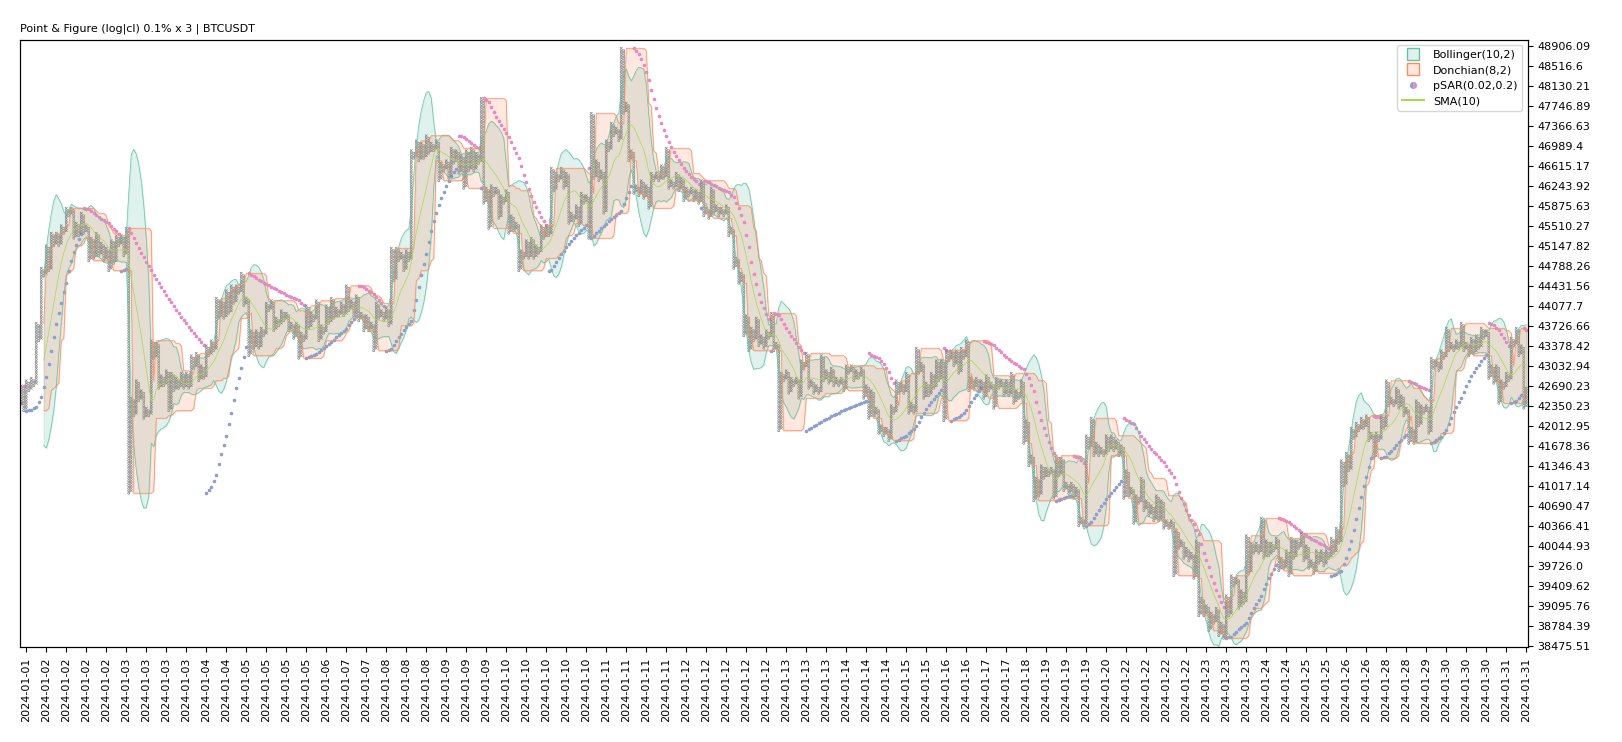

In [16]:
chart.show()